# Пример подготовки данных для отправки на визуализацию
Для этого нужно привести исходный BVH-файл к нужному фрэймрейту и обрезать по 1200 кадру по ограничениям сервера визуализации

In [16]:
from pymo.parsers import BVHParser
from pymo import viz_tools
from pymo.preprocessing import MocapParameterizer
from pymo.writers import BVHWriter

In [17]:
# читаем исходный файл
parser = BVHParser()
parsed_data = parser.parse('data/Motion/Recording_001.bvh')

In [18]:
# Проверяем фрэймрейт
target_fps = 20 # для сервера визуализации требуют 20 fps 
origin_fps = round(1.0 / parsed_data.framerate)
rate = origin_fps // target_fps
print(origin_fps, rate)

60 3


Для исходных файлов с разметкой, fps = 60. Поэтому для визуализации нужно оставить каждый третий кадр. Для сгенерированных жестов с помощью бэйзлайна 2, уже будет 20 fps

In [19]:
# оставляем нужные кадры
new_data = parsed_data.clone()
new_data.values = parsed_data.values[0:-1:rate]
new_data.framerate = 1.0 / target_fps

In [20]:
# оставляем первые 1200 кадров
new_data.values = new_data.values[:1200]

In [21]:
# записываем данные в файл, который можно будет послать на визуализацию сервером организаторов
writer = BVHWriter()

with open('output.bvh', 'w') as f:
    writer.write(new_data, f)

Далее этот файл можно отправить на визуализацию с помощью этого [скрипта](https://github.com/jonepatr/genea_challenge_2020/blob/master/visualization_example.py):\
`python visualization_example.py output.bvh`\
Когда он отработает, рядом появится видео с визуализацией `output.mp4`

## Визуализация с помощью PyMO
Также можно визуализировать данные в самом ноутбуке с помощью pymo

In [22]:
# получаем новый датафрейм, который содержит x,y,z координаты
mp = MocapParameterizer('position')
positions = mp.fit_transform([new_data])

MocapParameterizer: position


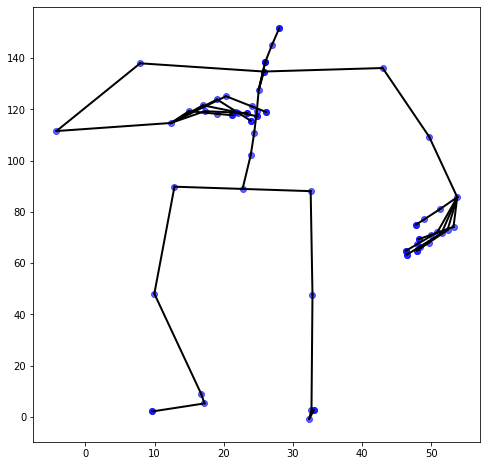

In [23]:
# можно визуализировать отдельный кадр
viz_tools.draw_stickfigure(positions[0], frame=0)

In [28]:
# или же сгенерировать видео
viz_tools.nb_play_mocap(positions[0], 'pos',  scale=2, camera_z=1800,frame_time=new_data.framerate, base_url='pymo/mocapplayer/playBuffer.html')

посмотреть его можно в `pymo/mocapplayer/playBuffer.html`